# Dibetic dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings("ignore")



import pickle
import json


# 1-problem statement

# 2- Data Gathering

In [2]:
df=pd.read_csv("diabetes.csv")
df

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             50             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3        150             66             23       94  28.1   
4        150             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   52        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

# 3-Exploratory Data(EDA):

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df["Glucose"]

0      148
1       85
2      183
3      150
4      150
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [6]:
df["Glucose"].value_counts()

100    17
99     17
150    15
106    14
129    14
       ..
44      1
177     1
191     1
61      1
190     1
Name: Glucose, Length: 136, dtype: int64

<AxesSubplot:xlabel='Glucose'>

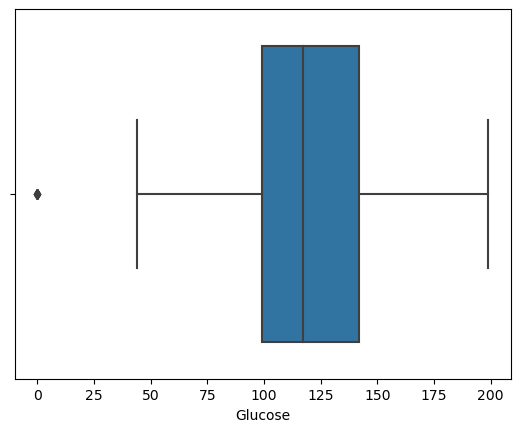

In [7]:
sns.boxplot(x=df["Glucose"])

# 3-Feature Engineering

<AxesSubplot:xlabel='Glucose'>

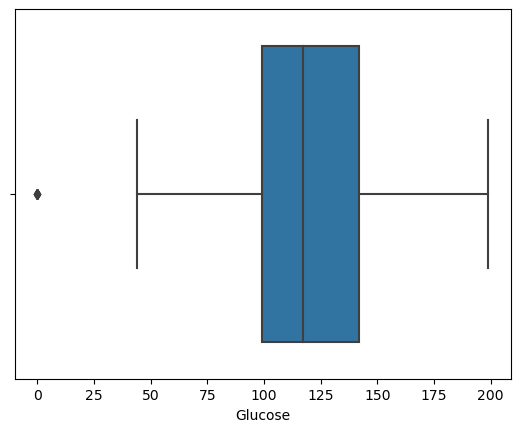

In [8]:
sns.boxplot(x=df["Glucose"])

In [9]:
q1 = df['Glucose'].quantile(0.25)
q2 = df['Glucose'].quantile(0.50)
q3 = df['Glucose'].quantile(0.75)
median = df['Glucose'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 99.0
Q2 : 117.0
Q3 : 142.0
Median : 117.0
upper_tail : 206.5
lower_tail : 34.5


In [10]:
df[['Glucose']].loc[df['Glucose'] < lower_tail]

Glucose
75         0
182        0
342        0
349        0
502        0

In [11]:
df[['Glucose']].loc[df['Glucose'] > upper_tail]

Empty DataFrame
Columns: [Glucose]
Index: []

In [12]:
median = df['Glucose'].loc[(df['Glucose'] <= upper_tail) & (df['Glucose'] >= lower_tail)].median()
median

118.0

In [13]:
df.loc[df['Glucose'] <= lower_tail]

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75         0             48             20        0  24.7   
182        0             74             20       23  27.7   
342        0             68             35        0  32.0   
349        0             80             32        0  41.0   
502        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

In [14]:
df.loc[df['Glucose'] < lower_tail, 'Glucose'] = lower_tail

In [15]:
df.loc[df['Glucose'] < lower_tail]

Empty DataFrame
Columns: [Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

<AxesSubplot:xlabel='Glucose'>

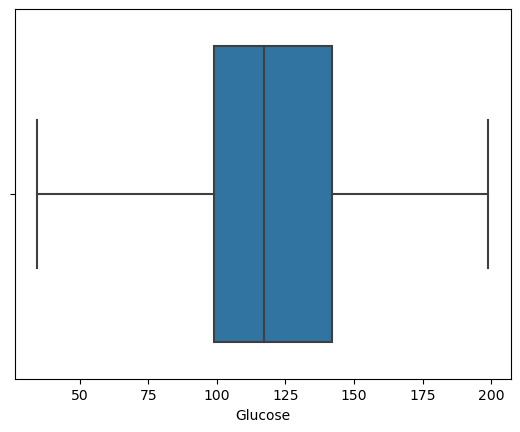

In [16]:
sns.boxplot(x=df["Glucose"])

### 2-BloodPressure

<AxesSubplot:xlabel='BloodPressure'>

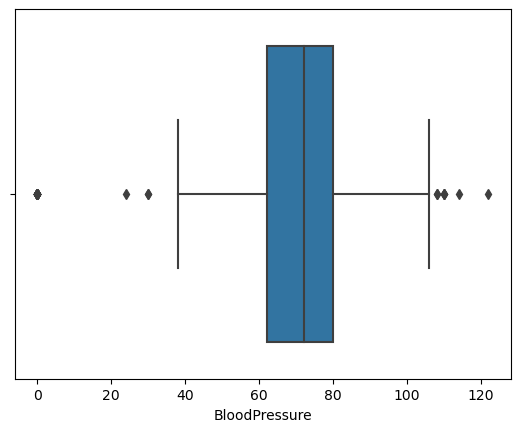

In [17]:
sns.boxplot(x=df["BloodPressure"])

In [18]:
q1 = df['BloodPressure'].quantile(0.25)
q2 = df['BloodPressure'].quantile(0.50)
q3 = df['BloodPressure'].quantile(0.75)
median = df['BloodPressure'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 62.0
Q2 : 72.0
Q3 : 80.0
Median : 72.0
upper_tail : 107.0
lower_tail : 35.0


In [19]:
Median = df['BloodPressure'].loc[(df['BloodPressure'] <= upper_tail) & (df['BloodPressure'] >= lower_tail)].median()
Median

72.0

In [20]:
df['BloodPressure'].loc[(df['BloodPressure'] > upper_tail) | (df['BloodPressure'] < lower_tail)]=Median

In [21]:
df['BloodPressure'].loc[(df['BloodPressure'] > upper_tail) | (df['BloodPressure'] < lower_tail)] 

Series([], Name: BloodPressure, dtype: int64)

<AxesSubplot:xlabel='BloodPressure'>

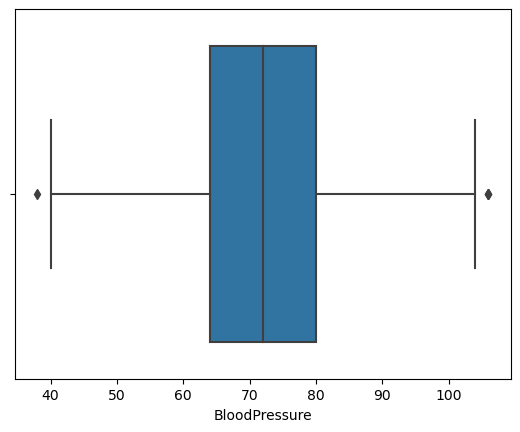

In [22]:
sns.boxplot(x=df["BloodPressure"])

In [23]:
q1 = df['BloodPressure'].quantile(0.25)
q2 = df['BloodPressure'].quantile(0.50)
q3 = df['BloodPressure'].quantile(0.75)
median = df['BloodPressure'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 64.0
Q2 : 72.0
Q3 : 80.0
Median : 72.0
upper_tail : 104.0
lower_tail : 40.0


In [24]:
df.loc[df['BloodPressure'] < lower_tail, 'BloodPressure'] = lower_tail

In [25]:
df.loc[df['BloodPressure'] > upper_tail, 'BloodPressure'] = upper_tail

<AxesSubplot:xlabel='BloodPressure'>

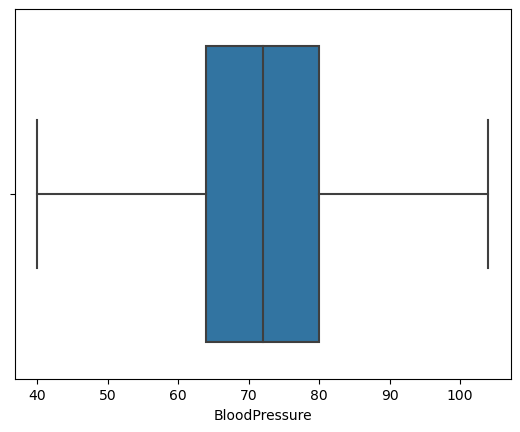

In [26]:
sns.boxplot(x=df["BloodPressure"])

### 3-SkinThickness

<AxesSubplot:xlabel='SkinThickness'>

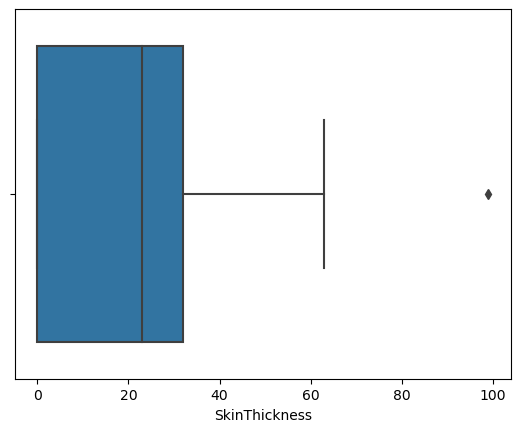

In [27]:
sns.boxplot(x=df["SkinThickness"])

In [28]:
q1 = df['SkinThickness'].quantile(0.25)
q2 = df['SkinThickness'].quantile(0.50)
q3 = df['SkinThickness'].quantile(0.75)
median = df['SkinThickness'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 0.0
Q2 : 23.0
Q3 : 32.0
Median : 23.0
upper_tail : 80.0
lower_tail : -48.0


In [29]:
df['SkinThickness'].loc[(df['SkinThickness'] > upper_tail) | (df['SkinThickness'] < lower_tail)] 

579    99
Name: SkinThickness, dtype: int64

In [30]:
df.loc[df['SkinThickness'] > upper_tail, 'SkinThickness'] = upper_tail

<AxesSubplot:xlabel='SkinThickness'>

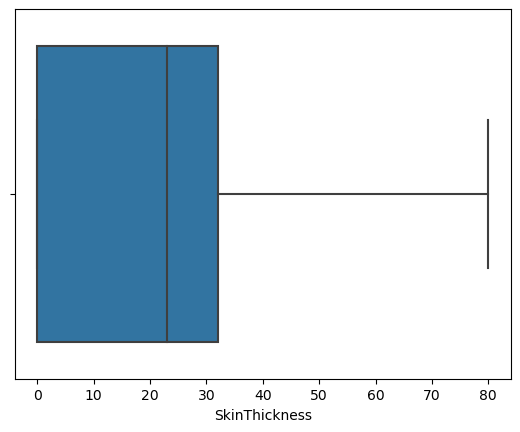

In [31]:
sns.boxplot(x=df["SkinThickness"])

### 4-Insulin

<AxesSubplot:xlabel='Insulin'>

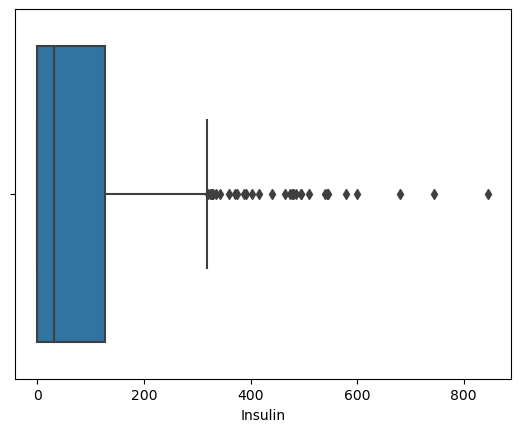

In [32]:
sns.boxplot(x=df["Insulin"])

In [33]:
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.50)
q3 = df['Insulin'].quantile(0.75)
median = df['Insulin'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 0.0
Q2 : 30.5
Q3 : 127.25
Median : 30.5
upper_tail : 318.125
lower_tail : -190.875


In [34]:
df['Insulin'].loc[(df['Insulin'] > upper_tail) | (df['Insulin'] < lower_tail)] 

8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64

In [35]:
df.loc[df['Insulin'] > upper_tail, 'Insulin'] = upper_tail

<AxesSubplot:xlabel='Insulin'>

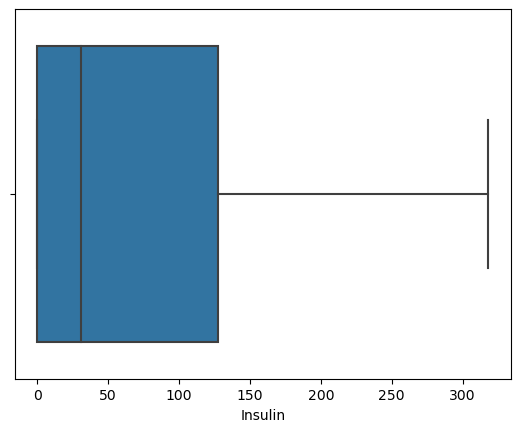

In [36]:
sns.boxplot(x=df["Insulin"])

### 5-BMI

<AxesSubplot:xlabel='BMI'>

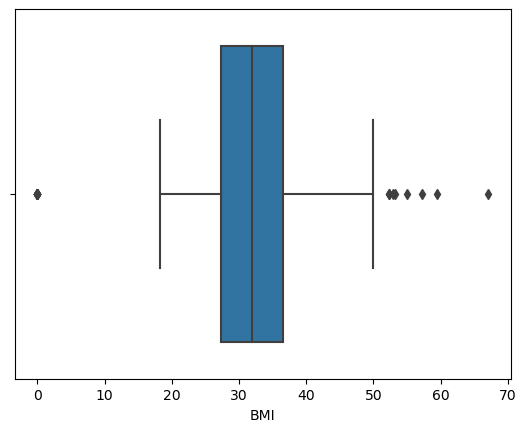

In [37]:
sns.boxplot(x=df["BMI"])

In [38]:
q1 = df['BMI'].quantile(0.25)
q2 = df['BMI'].quantile(0.50)
q3 = df['BMI'].quantile(0.75)
median = df['BMI'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 27.3
Q2 : 32.0
Q3 : 36.6
Median : 32.0
upper_tail : 50.550000000000004
lower_tail : 13.35


In [39]:
df['BMI'].loc[(df['BMI'] > upper_tail) | (df['BMI'] < lower_tail)] 

9       0.0
49      0.0
60      0.0
81      0.0
120    53.2
125    55.0
145     0.0
177    67.1
193    52.3
247    52.3
303    52.9
371     0.0
426     0.0
445    59.4
494     0.0
522     0.0
673    57.3
684     0.0
706     0.0
Name: BMI, dtype: float64

In [40]:
df.loc[df['BMI'] < lower_tail, 'BMI'] = lower_tail
df.loc[df['BMI'] > upper_tail, 'BMI'] = upper_tail


<AxesSubplot:xlabel='BMI'>

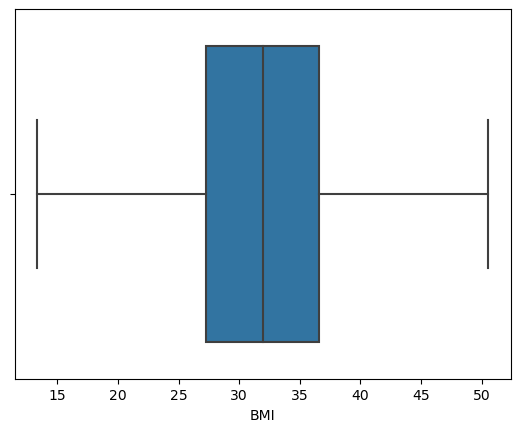

In [41]:
sns.boxplot(x=df["BMI"])

#### 5-DiabetesPedigreeFunction

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

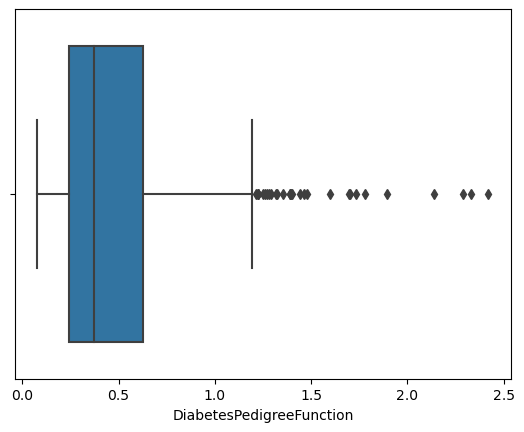

In [42]:
sns.boxplot(x=df["DiabetesPedigreeFunction"])

In [43]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q2 = df['DiabetesPedigreeFunction'].quantile(0.50)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
median = df['DiabetesPedigreeFunction'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 0.24375
Q2 : 0.3725
Q3 : 0.62625
Median : 0.3725
upper_tail : 1.2
lower_tail : -0.32999999999999996


In [44]:
df['DiabetesPedigreeFunction'].loc[(df['DiabetesPedigreeFunction'] > upper_tail) | (df['DiabetesPedigreeFunction'] < lower_tail)] = 1.500000

In [45]:
df['DiabetesPedigreeFunction'].loc[(df['DiabetesPedigreeFunction'] > upper_tail) | (df['DiabetesPedigreeFunction'] < lower_tail)]

4      1.5
12     1.5
39     1.5
45     1.5
58     1.5
100    1.5
147    1.5
187    1.5
218    1.5
228    1.5
243    1.5
245    1.5
259    1.5
292    1.5
308    1.5
330    1.5
370    1.5
371    1.5
383    1.5
395    1.5
445    1.5
534    1.5
593    1.5
606    1.5
618    1.5
621    1.5
622    1.5
659    1.5
661    1.5
Name: DiabetesPedigreeFunction, dtype: float64

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

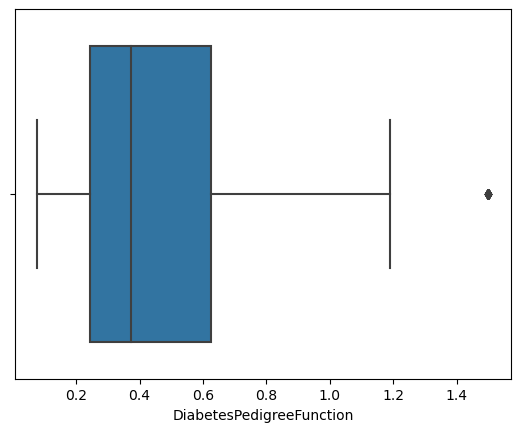

In [46]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

In [47]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q2 = df['DiabetesPedigreeFunction'].quantile(0.50)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
median = df['DiabetesPedigreeFunction'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 0.24375
Q2 : 0.3725
Q3 : 0.62625
Median : 0.3725
upper_tail : 1.2
lower_tail : -0.32999999999999996


In [48]:
df.loc[df['DiabetesPedigreeFunction'] > upper_tail, 'DiabetesPedigreeFunction'] = upper_tail


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

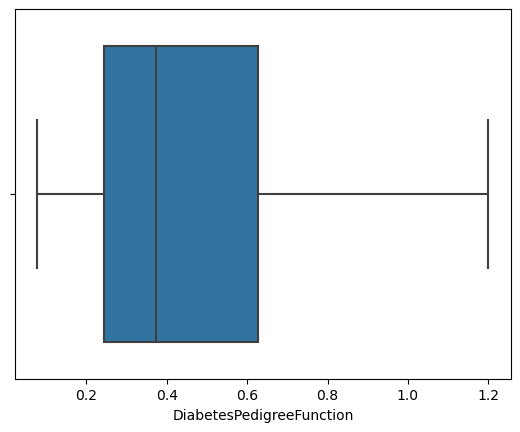

In [49]:
sns.boxplot(x=df["DiabetesPedigreeFunction"])

<AxesSubplot:xlabel='Age'>

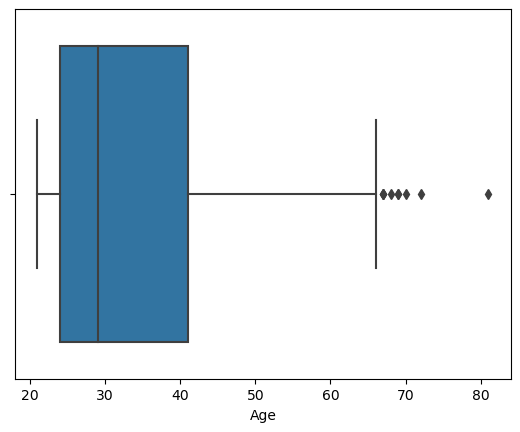

In [51]:
sns.boxplot(x=df["Age"])

In [52]:
q1 = df["Age"].quantile(0.25)
q2 = df["Age"].quantile(0.50)
q3 = df['BMI'].quantile(0.75)
median = df["Age"].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 24.0
Q2 : 29.0
Q3 : 36.6
Median : 29.0
upper_tail : 55.5
lower_tail : 5.099999999999998


In [53]:
df.loc[df['Age'] > upper_tail, 'Age'] = upper_tail

<AxesSubplot:xlabel='Age'>

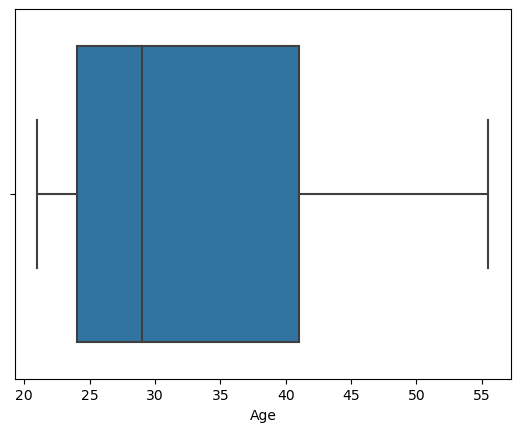

In [54]:
sns.boxplot(x=df["Age"])

# 5.feature selection

In [59]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
#x

In [57]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

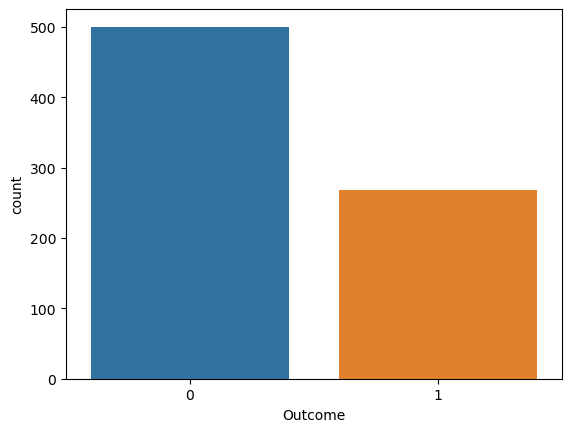

In [60]:
sns.countplot(x = df['Outcome'])

In [61]:
# Train test split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10,stratify=y)

x_train

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
745    100.0             84             33    105.0  30.0   
67     109.0             92              0      0.0  42.7   
570     78.0             70              0      0.0  32.5   
517    125.0             86              0      0.0  37.6   
717     94.0             72             18      0.0  23.1   
..       ...            ...            ...      ...   ...   
735     95.0             60             32      0.0  35.4   
475    137.0             84             27      0.0  27.3   
46     146.0             56              0      0.0  29.7   
767     93.0             70             31      0.0  30.4   
540    100.0             74             40    215.0  39.4   

     DiabetesPedigreeFunction   Age  
745                     0.488  46.0  
67                      0.845  54.0  
570                     0.270  39.0  
517                     0.304  51.0  
717                     0.595  55.5  
..                        ...   ...  
735                     0.284  28.0  
475                     0.231  55.5  
46                      0.564  29.0  
767                     0.315  23.0  
540                     0.661  43.0  

[576 rows x 7 columns]

# Model Building

In [65]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred=model.predict(x_test)
cnf_matrix=confusion_matrix(y_pred,y_test)
accuracy=accuracy_score(y_pred,y_test)
clf_report=classification_report(y_pred,y_test)
print("Confusion Matrix:\n",cnf_matrix)
print()
print("Accuracy:\n",accuracy)
print()
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[109  23]
 [ 16  44]]

Accuracy:
 0.796875

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       132
           1       0.66      0.73      0.69        60

    accuracy                           0.80       192
   macro avg       0.76      0.78      0.77       192
weighted avg       0.80      0.80      0.80       192



In [68]:
# Training accuracy
y_pred_train=model.predict(x_train)
cnf_matrix=confusion_matrix(y_pred_train,y_train)
accuracy=accuracy_score(y_pred_train,y_train)
clf_report=classification_report(y_pred_train,y_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*50)
print("Accuracy:\n",accuracy)
print("*"*50)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[325  86]
 [ 50 115]]
**************************************************
Accuracy:
 0.7638888888888888
**************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       411
           1       0.57      0.70      0.63       165

    accuracy                           0.76       576
   macro avg       0.72      0.74      0.73       576
weighted avg       0.78      0.76      0.77       576



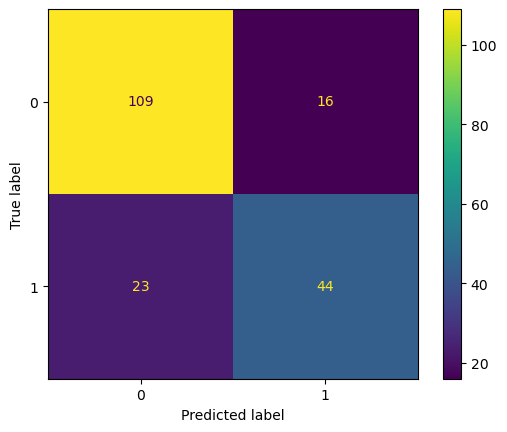

In [67]:
plot_confusion_matrix(model,x_test,y_test)

# AUC and ROC Curve

In [72]:
y_pred_prob = model.predict_proba(x_train)  
y_pred_prob[:,1]


fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])


In [73]:
thresh

array([1.9758471 , 0.9758471 , 0.97258977, 0.91821448, 0.91048069,
       0.86878733, 0.86787179, 0.86558019, 0.86502727, 0.83097   ,
       0.8264737 , 0.82100748, 0.81695795, 0.80624395, 0.80245253,
       0.7928553 , 0.79159499, 0.787415  , 0.78622624, 0.78071896,
       0.77658734, 0.76801258, 0.75878787, 0.74883637, 0.74403076,
       0.73028188, 0.72135243, 0.71192859, 0.70350755, 0.6951388 ,
       0.69176169, 0.68035937, 0.67486018, 0.67377016, 0.66906561,
       0.66018423, 0.64209578, 0.63446298, 0.6336043 , 0.62313976,
       0.61639675, 0.61466501, 0.6134813 , 0.60321657, 0.5991473 ,
       0.59575771, 0.58625366, 0.5845236 , 0.58410869, 0.583464  ,
       0.58323968, 0.57342173, 0.57230529, 0.56968943, 0.56869329,
       0.56844637, 0.56781399, 0.5673875 , 0.55951567, 0.54613376,
       0.5397373 , 0.53037225, 0.5293914 , 0.52933067, 0.52861231,
       0.51910855, 0.51874729, 0.51863162, 0.50929592, 0.50608372,
       0.50373459, 0.49722899, 0.49430888, 0.48263111, 0.47053

Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

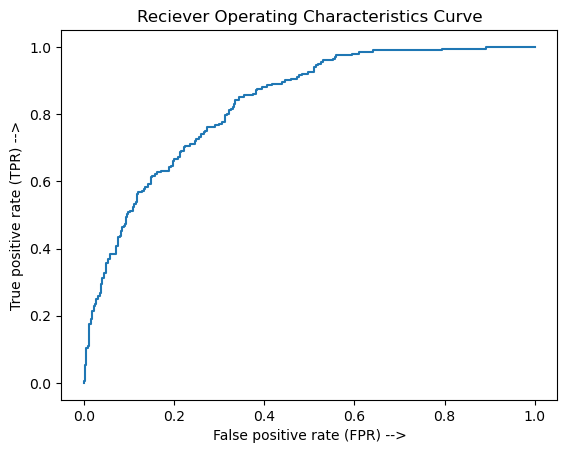

In [74]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR) -->")
plt.ylabel("True positive rate (TPR) -->")
plt.title("Reciever Operating Characteristics Curve")

In [75]:
threshold = [0.5, 0.6, 0.7, 0.8,0.9]

df = pd.DataFrame()

for i in  threshold:
    preds = (model.predict_proba(x_test)[:,1] > i).astype(int)

    df1 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)],
                index=["Accuracy", "recall", "Precision", "F1-Score"])
    
    df = pd.concat([df,df1], axis = 1)
    
df.columns = threshold
df

0.5       0.6       0.7       0.8       0.9
Accuracy   0.796875  0.802083  0.796875  0.723958  0.677083
recall     0.656716  0.567164  0.507463  0.268657  0.104478
Precision  0.733333  0.808511  0.850000  0.818182  0.777778
F1-Score   0.692913  0.666667  0.635514  0.404494  0.184211

In [78]:
auc_value = auc(fpr, tpr)
auc_value

0.8309651741293533

In [76]:
np.where(thresh >= 0.499999)[0][-1]

70

In [77]:
tpr[70] 

0.572139303482587

In [79]:
x.head(1).T

0
Glucose                   148.000
BloodPressure              50.000
SkinThickness              35.000
Insulin                     0.000
BMI                        33.600
DiabetesPedigreeFunction    0.627
Age                        50.000

In [80]:
column_names=x.columns

In [81]:
with open("logestic_model.pkl","wb") as f:
    pickle.dump(model,f)

In [82]:
json_data={"columns":list(column_names)}
json_data

{'columns': ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [83]:
with open("project_data.json","w") as f:
    json.dump(json_data,f)

# User inputs

In [84]:
Glucose=148.000
BloodPressure=50.000
SkinThickness=35.000
Insulin=0.000
BMI=33.600
DiabetesPedigreeFunction=0.627
Age=50.000

In [85]:
json_data["columns"]

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [86]:


test_array=np.zeros(len(column_names))
test_array[0]=Glucose
test_array[1]=BloodPressure
test_array[2]=SkinThickness
test_array[3]=Insulin
test_array[4]=BMI
test_array[5]=DiabetesPedigreeFunction
test_array[6]=Age

In [87]:
value=round(model.predict([test_array])[0],2)
if value==1:
    print("Yes,You are diabetic patient")
else:
    print("Dont Worry,you are away from diabetic")
#print("Predicted medical insurance is:",charges,"/- Rs only")

Yes,You are diabetic patient
